# Homework 01

**Bernard Mwamburi**

## Preparing the Environment

Use the cell below to import NumPy, Pandas, and the Pyplot library of Matplotlib, using the standard aliases. Also import the following tools from Scikit-Learn: `train_test_split`, `cross_val_score`, `LinearRegression`, and `StandardScaler`. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Part 1: Boston Housing Data

In Part 1, you will be working with the Boston Housing Dataset. Your goal will be to create a linear regression model to predict the median value of homes in neighborhoods of Boston using various characteristics of the neighborhoods as features. You can find detailed information about the dataset, including a description of its features [here](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/notebook). 

Use the cell below to load the dataset into a DataFrame named `boston`. Shuffle the dataset (setting `random_state=1`), print its shape, and then display the head of the DataFrame. 


In [2]:
boston = pd.read_csv('boston_housing.csv')
boston = boston.sample(frac=1, random_state=1)
boston.head()

,town,tract,lon,lat,medv,cmedv,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
307,Milton,4164,-71.028,42.1565,28.2,28.2,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
343,Hingham,5011,-70.937,42.1475,23.9,23.9,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
47,Peabody,2107,-70.956,42.3125,16.6,16.6,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80
67,Wilmington,3311,-71.090,42.3362,22.0,22.0,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10
362,Boston Allston-Brighton,7,-71.081,42.2080,20.8,20.8,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19


Each record in the DataFrame above represents a tract (or area) of Boston. The `cmedv` column contains the "corrected" median value of homes in each tract, and will be our label column. The `medv` column contains an earlier estimate of the label values, and will be ignored. The column `tract` is a unique identifer of the tracts, and will be ignored. The column `town` is a categorical feature, and will be ignored in this assignment. The column `chas` is a binary categorical variable, which can be treated as a numerical feature. All other columns represent numerical features. 

Use the cell below to create a histogram of `cmedv`. Your histogram should have 20 bins. Select a [named color](https://matplotlib.org/stable/gallery/color/named_colors.html) for the bars, and set their `edgecolor` to black. Set the title to "Histogram of Median Home Values". Use `plt.show()` to display the figure. 

**Note:** As a general rule, which selecting colors, you should avoid colors that are highly-saturated, since these can be visually harsh. You should tend toward colors that are more muted, such as pastels. 

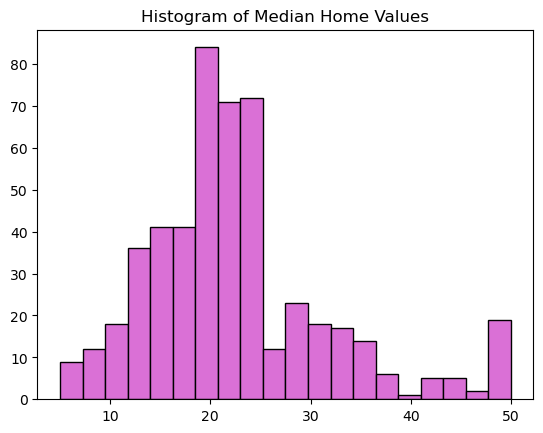

In [3]:
plt.hist(boston.cmedv, bins=20, color='orchid', edgecolor='k')
plt.title("Histogram of Median Home Values")

plt.show()

In the cell below, create any array to hold the names of the feature columns that we will be using in this exercise. It might be easiest to select these from the array `boston.columns.values`. Print this array to confirm that you have selected the correct features. 

In [4]:
features = ['lon', 'lat', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
print(features)

['lon', 'lat', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


Create a feature array and a label array. Name these `X1` and `y1`, or something similar.

In [5]:
X1 = boston[features]
y1 = boston.cmedv

Create an instance of `StandardScaler` and use it to scale the feature array. 

In [6]:
scaler = StandardScaler()
scaler.fit_transform(X1)

array([[ 0.37685429, -0.97122643, -0.41477789, ..., -0.02567665,
         0.44105193, -0.71811916],
       [ 1.58485952, -1.11705545, -0.41755805, ..., -0.39556665,
         0.44105193, -0.76717998],
       [ 1.33263865,  1.55647666, -0.39383653, ..., -0.2568579 ,
         0.3954402 ,  0.86163938],
       ...,
       [ 0.40340386, -0.2777284 ,  0.26283202, ...,  0.80657583,
         0.44105193,  0.94153844],
       [-1.08337181, -0.03792067, -0.38206188, ..., -0.48803915,
         0.22012011, -0.24853698],
       [ 0.69544908,  1.13519282, -0.41119127, ...,  0.34421334,
         0.44105193, -0.54430367]])

Perform the following steps in the cell below: (1) Create an instance of LinearRegression, (2) train it on dataset (using the scaled features), (3) print the model intercept and model coefficients. 

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state=1)

In [8]:
lm = LinearRegression()
lm.fit(X1_train, y1_train)
print(f"""
Intercept:          {lm.intercept_}
Model coefficients: {lm.coef_}
""")


Intercept:          -375.8875004130923
Model coefficients: [-3.76362003e+00  3.46157901e+00 -1.00327713e-01  5.50436633e-02
  2.68941543e-02  2.69294509e+00 -1.62315204e+01  3.23113214e+00
  6.07841822e-03 -1.39632834e+00  2.80606125e-01 -1.11051994e-02
 -9.17076138e-01  1.01125634e-02 -5.67647418e-01]



Use the `score()` method to calculate the training r-squared value for the model. 

In [9]:
print(f"""
Training r-squared: {lm.score(X1_train, y1_train)}
Test r-squared:     {lm.score(X1_test, y1_test)}
""")


Training r-squared: 0.731364691031646
Test r-squared:     0.7804070621380069



Use `cross_val_score()` to estimate the model's out of-sample r-squared value. 

In [10]:
print(f"Cross validation score: {cross_val_score(lm, X1_train, y1_train, cv=10, scoring='r2').mean()}")

Cross validation score: 0.7027960535728877


Create a DataFrame with two columns: The first should contain the names of the features (as stored in the array you created previously). The second column should contain the absolute value of the corresponding coefficients for the linear regression model. Sort this DataFrame in ascending order according to the second column. 

In [11]:
df = pd.DataFrame(data={'columns': features,
                        'coefficients': abs(lm.coef_)})
df.sort_values(by='coefficients', inplace=True, ignore_index=True)
df

,columns,coefficients
0,age,0.006078
1,b,0.010113
2,tax,0.011105
3,indus,0.026894
4,zn,0.055044
5,crim,0.100328
6,rad,0.280606
7,lstat,0.567647
8,ptratio,0.917076
9,dis,1.396328


Use the DataFrame from the previous cell and `plt.barh()` to create a horizontal bar chart demonstrating the magnitude of the coefficient values for each feature. Select a [named color](https://matplotlib.org/stable/gallery/color/named_colors.html) for the bars, and set their `edgecolor` to black. Set the title to "Coefficient Values". Use `plt.show()` to display the figure. 

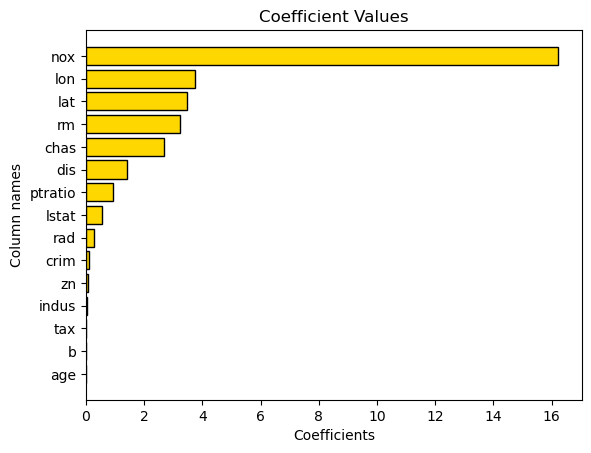

In [12]:
plt.barh(df['columns'], df['coefficients'], label=df['columns'], color='gold', edgecolor='k')
plt.xlabel("Coefficients")
plt.ylabel("Column names")
plt.title("Coefficient Values")
plt.show()

# Part 2: Diamonds Dataset

In Part 2, you will be working with the Diamonds Dataset. Your goal will be to create a linear regression model to predict the price of a diamond using several numerical characteristics of the diamond as features. You can find detailed information about the dataset, including a description of its features [here](https://www.kaggle.com/datasets/shivam2503/diamonds). 

Use the cell below to load the dataset into a DataFrame named `diamonds`. Shuffle the dataset (setting `random_state=1`), print its shape, and then display the head of the DataFrame. 

In [13]:
diamonds = pd.read_csv('diamonds.csv')
diamonds = diamonds.sample(frac=1, random_state=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2714,0.33,Ideal,H,SI1,61.7,55.0,564,4.43,4.46,2.74
14653,1.20,Ideal,I,VS2,62.1,57.0,5914,6.78,6.71,4.19
52760,0.62,Ideal,D,VS1,61.0,57.0,2562,5.51,5.54,3.37
48658,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80
14812,1.20,Ideal,E,SI2,62.5,55.0,5964,6.77,6.84,4.25


Each record in the DataFrame above represents a single diamond sold in the US. The `price` column represents the label. The `cut`, `color`, and `clarity` columns represent categorical features that will not be used in this assignment. All other columns represent numerical features.

Use the cell below to create a histogram of the `price` column. Your histogram should have 20 bins. Select a [named color](https://matplotlib.org/stable/gallery/color/named_colors.html) for the bars, and set their `edgecolor` to black. Set the title to "Histogram of Median Home Values". Use `plt.show()` to display the figure. 

Text(0.5, 1.0, 'Histogram of Diamond Prices')

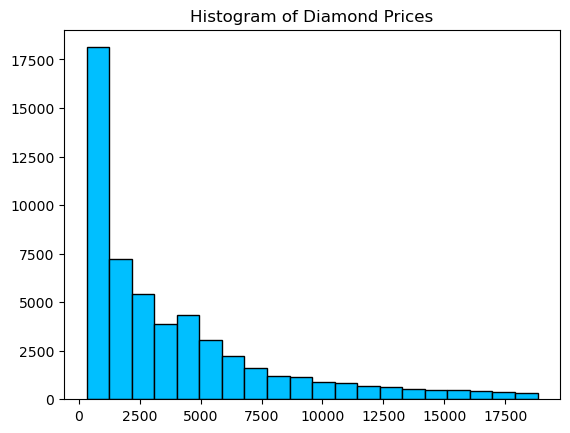

In [14]:
plt.hist(diamonds.price, bins=20, color="deepskyblue", edgecolor="k")
plt.title("Histogram of Diamond Prices")

The price and carat size of diamonds in this dataset have an exponential relationship rather than a linear one. We will confirm this momentarily. We will also confirm that the natural log of each of these columns will display an approximately linear relationship. 

In the cell below, add two new columns to the `diamonds` DataFrame. These should be named `log_price` and `log_carat`, and should contain the natural logarithms of the `price` and `carat` columns respectively. You can calculate the natural logarithms using `np.log()`. 

After adding the new columns, display the head of the DataFrame. 

In [15]:
diamonds.loc[:, 'log_price'], diamonds.loc[:, 'log_carat'] = np.log(diamonds.price), np.log(diamonds.carat)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat
2714,0.33,Ideal,H,SI1,61.7,55.0,564,4.43,4.46,2.74,6.335054,-1.108663
14653,1.20,Ideal,I,VS2,62.1,57.0,5914,6.78,6.71,4.19,8.685078,0.182322
52760,0.62,Ideal,D,VS1,61.0,57.0,2562,5.51,5.54,3.37,7.848543,-0.478036
48658,0.34,Good,H,VS2,63.1,56.0,537,4.41,4.46,2.80,6.285998,-1.078810
14812,1.20,Ideal,E,SI2,62.5,55.0,5964,6.77,6.84,4.25,8.693497,0.182322


Use `plt.subplot()` to create a 1x2 grid of subplots. The first subplot should be a scatter plot of `price` against `carat`. The second should be a scatter plot of `log_price` against `log_carat`. For both scatterplots, selected a named color for the points and set their `alpha` (or opaqueness) to 0.6. 

The first subplot should have x and y axes labeled as "Carat" and "Price" (respectively), and should have a title of "Price vs Carat". The second subplot should have x and y axes labeled as "ln(Carat)" and "ln(Log Price)" (respectively), and should have a title of "ln(Price) vs ln(Carat)". 

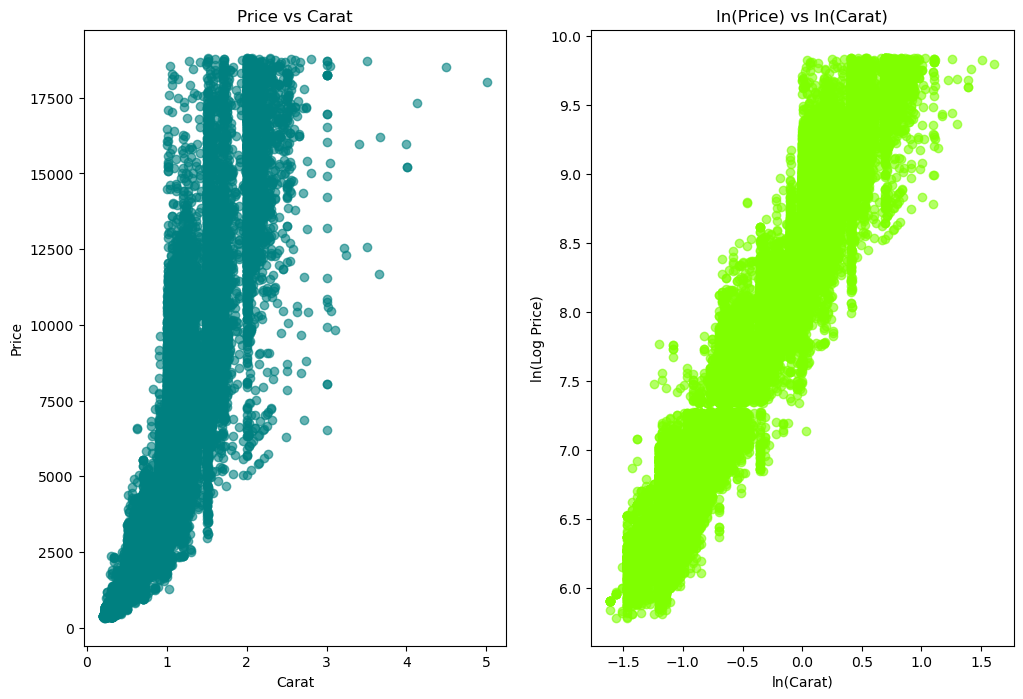

In [16]:
plt.figure(figsize=[12, 8])
plt.subplot(1,2,1)
plt.scatter(diamonds.carat, diamonds.price, color='teal', alpha=0.6)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs Carat')

plt.subplot(1,2,2)
plt.scatter(diamonds.log_carat, diamonds.log_price, color='chartreuse', alpha=0.6)
plt.xlabel('ln(Carat)')
plt.ylabel('ln(Log Price)')
plt.title('ln(Price) vs ln(Carat)')

plt.show()

Going forward, we will use `log_price` as the label instead of `price`, and we will use `log_carat` as a feature in place of `carat`. 

In the cell below, create any array to hold the names of the numerical feature columns that we will be using in this exercise. 

In [18]:
features2 = ['depth', 'table', 'x', 'y', 'z', 'log_carat']

Create a feature array and a label array. Name these `X2` and `y2`, or something similar.

In [19]:
X2 = diamonds[features2]
y2 = diamonds.log_price

Create an instance of `StandardScaler` and use it to scale the feature array. 

In [20]:
preprocessor = StandardScaler()
preprocessor.fit_transform(X2)

array([[-0.03448598, -1.09967199, -1.15993475, -1.11592599, -1.13184425,
        -1.22036373],
       [ 0.24472507, -0.20460509,  0.93500554,  0.85408762,  0.92287562,
         0.9871182 ],
       [-0.52310533, -0.20460509, -0.19715368, -0.17031946, -0.23910389,
        -0.14204121],
       ...,
       [ 0.66354165,  2.48059561,  0.28423685,  0.23243888,  0.34188586,
         0.51409872],
       [-0.03448598, -0.65213854,  0.94392018,  0.9503994 ,  0.9370461 ,
         0.95837934],
       [-0.59290809, -0.65213854, -1.17776403, -1.14219284, -1.20269666,
        -1.27298086]])

Perform the following steps in the cell below: (1) Create an instance of LinearRegression, (2) train it on dataset (using the scaled features), (3) print the model intercept and model coefficients. 

In [21]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state = 1)

In [22]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
print(f"""
Intercept:          {lm2.intercept_}
Model Coefficients: {lm2.coef_}
""")


Intercept:          11.65354615792726
Model Coefficients: [-0.03212807 -0.01858183 -0.04207623  0.00420601  0.02436735  1.73457276]



Use the `score()` method to calculate the training r-squared value for the model. 

In [23]:
print(f"""
Training r-squared: {lm2.score(X2_train, y2_train)}
Test r-squared:     {lm2.score(X2_test, y2_test)}
""")


Training r-squared: 0.935266851839351
Test r-squared:     0.9353652966157293



Use `cross_val_score()` to estimate the model's out of-sample r-squared value. 

In [24]:
print(f"Cross validation score: {cross_val_score(lm2, X2_train, y2_train, scoring='r2').mean()}")

Cross validation score: 0.9336344355962944


Create a DataFrame with two columns: The first should contain the names of the features (as stored in the array you created previously). The second column should contain the absolute value of the corresponding coefficients for the linear regression model. Sort this DataFrame in ascending order according to the second column. 

In [25]:
df2 = pd.DataFrame(data={
    'colnames': features2,
    'coefficients': abs(lm2.coef_)
})
df2.sort_values("coefficients", inplace=True, ignore_index=True)
df2

,colnames,coefficients
0,y,0.004206
1,table,0.018582
2,z,0.024367
3,depth,0.032128
4,x,0.042076
5,log_carat,1.734573


Use the DataFrame from the previous cell and `plt.barh()` to create a horizontal bar chart demonstrating the magnitude of the coefficient values for each feature. Select a [named color](https://matplotlib.org/stable/gallery/color/named_colors.html) for the bars, and set their `edgecolor` to black. Set the title to "Coefficient Values". Use `plt.show()` to display the figure. 

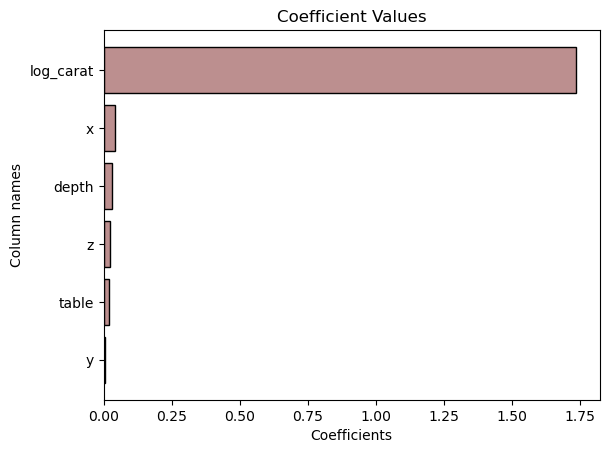

In [26]:
plt.barh(df2['colnames'], df2['coefficients'], label=df2['colnames'], color='rosybrown', edgecolor='k')
plt.xlabel("Coefficients")
plt.ylabel("Column names")
plt.title("Coefficient Values")
plt.show()